# 规模和价值投资组合

In [20]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats # 统计模块
import scipy
from datetime import datetime # 时间模块
from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图 是一个魔法函数（Magic Functions）内嵌绘图
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [21]:
cross = pd.read_csv('C:/Users/hp/Desktop/Python/Python-5/cross_section.csv')
cross['month'] = pd.to_datetime(cross['month'],format='%Y-%m-%d')
cross['to_v'] = pd.to_numeric(cross['to_v'])
cross['floatingvalue'] = pd.to_numeric(cross['floatingvalue'])
cross = cross.dropna(subset=['ret','next_ret'])
cross

,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883
1,1,1991-06-01,9.007350e+08,1.648521e+09,-0.113459,0.006092,3,23,-0.119551,-0.137013,20.618722,21.223144,1,33.99,0.246808,67.0,0.246808,67.0,NaN,NaN,NaN,0.001155,0.000895,0.004956
2,1,1991-07-01,7.828100e+08,1.432695e+09,-0.130921,0.006092,4,16,-0.137013,-0.417680,20.478401,21.082823,1,29.54,0.165424,83.0,0.165424,83.0,NaN,NaN,NaN,0.000230,0.001596,-0.004853
3,1,1991-08-01,6.748338e+08,1.346275e+09,-0.411588,0.006092,5,15,-0.417680,-0.039425,20.329977,21.020607,1,15.00,1.506699,98.0,1.506699,98.0,NaN,NaN,NaN,0.072087,0.240913,0.152896
4,1,1991-09-01,6.523394e+08,1.301399e+09,-0.033333,0.006092,6,24,-0.039425,0.849080,20.296075,20.986706,1,14.50,1.502630,122.0,1.502630,122.0,NaN,NaN,NaN,0.160940,0.005872,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604788,605589,2021-11-01,3.192953e+09,3.051846e+10,0.319156,0.001241,4,22,0.317915,-0.028913,21.884212,24.141598,1,39.39,2.063907,73.0,2.063907,73.0,0.259870,0.429465,NaN,1.812936,0.025807,0.077155
604790,605598,2021-10-01,5.874312e+08,2.349311e+09,-0.093937,0.001241,2,16,-0.095178,0.076700,20.191270,21.577388,1,13.60,1.221250,23.0,1.221250,23.0,0.612103,0.755971,NaN,1.345783,0.007366,0.040237
604791,605598,2021-11-01,6.332162e+08,2.532419e+09,0.077941,0.001241,3,22,0.076700,0.085389,20.266323,21.652441,1,14.66,1.053620,45.0,1.053620,45.0,0.567844,0.701310,NaN,1.263335,0.005363,0.031528
604793,605599,2021-10-01,9.076669e+08,9.076667e+09,-0.080378,0.001241,2,16,-0.081619,0.060456,20.626388,22.928973,1,11.67,1.339638,29.0,1.339638,29.0,0.342676,0.529242,NaN,0.970121,0.009502,0.034691


In [22]:
fenweishu = pd.DataFrame(
    cross.groupby(['month'])['totalvalue'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu = fenweishu.reset_index()
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='totalvalue')
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-01,7.499850e+06,1.324290e+07,4.841034e+07,8.357778e+07,1.645389e+08,2.455000e+08,5.287392e+08,8.119784e+08,9.109892e+08
1991-02-01,1.168762e+07,1.787684e+07,6.941160e+07,1.426559e+08,2.168625e+08,4.029251e+08,6.804663e+08,8.582599e+08,1.065150e+09
1991-03-01,1.098601e+07,1.691778e+07,4.002500e+07,7.086472e+07,1.199623e+08,3.103026e+08,6.328671e+08,8.540667e+08,9.379800e+08
1991-04-01,1.106975e+07,1.805230e+07,3.729500e+07,6.259785e+07,1.070732e+08,2.760596e+08,5.889068e+08,8.629674e+08,9.611433e+08
1991-05-01,1.310760e+07,2.075000e+07,3.930000e+07,7.435439e+07,1.237500e+08,4.656752e+08,8.200000e+08,9.495000e+08,1.179490e+09
...,...,...,...,...,...,...,...,...,...
2021-07-01,2.081622e+09,2.742863e+09,3.467994e+09,4.286215e+09,5.415539e+09,7.349796e+09,1.069158e+10,1.748131e+10,3.325431e+10
2021-08-01,2.186054e+09,2.904676e+09,3.654128e+09,4.559665e+09,5.827044e+09,7.749763e+09,1.138477e+10,1.867720e+10,3.599513e+10
2021-09-01,2.145854e+09,2.824810e+09,3.590758e+09,4.410587e+09,5.608188e+09,7.472455e+09,1.102305e+10,1.802354e+10,3.570321e+10


In [23]:
portfolio = pd.merge(cross,fenweishu,on='month')
portfolio

,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1,one,two,three,four,five,six,seven,eight,nine
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09
1,2,1991-05-01,3.161200e+08,4.656752e+08,-0.030901,0.006092,5,17,-0.036993,-0.309901,19.571632,19.958999,1,11.29,-84.718227,71.0,-84.718227,71.0,NaN,NaN,NaN,0.055375,0.001412,0.016379,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09
2,4,1991-05-01,4.950000e+07,1.237500e+08,-0.114490,0.006092,5,16,-0.120582,-0.460637,17.717483,18.633774,1,9.90,14.033671,62.0,14.033671,62.0,NaN,NaN,NaN,0.036300,0.002604,0.014563,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09
3,5,1991-05-01,4.502265e+08,9.495000e+08,-0.123026,0.006092,5,20,-0.129118,-0.115097,19.925261,20.671446,1,10.55,8.686426,77.0,8.686426,77.0,NaN,NaN,NaN,0.030158,0.001104,-0.004566,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09
4,600601,1991-05-01,3.576300e+07,3.930000e+07,-0.124722,0.006092,6,22,-0.130814,0.184748,17.392424,17.486735,1,39.30,0.998295,90.0,0.998295,90.0,0.270784,0.515407,0.012968,0.081956,0.002149,0.010499,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596105,600602,1991-01-01,2.479550e+08,1.010000e+09,0.009798,0.006930,2,22,0.002868,0.010496,19.328758,20.733216,1,505.00,0.985174,30.0,0.985174,30.0,0.294219,1.157426,0.022901,0.117475,0.000648,0.010097,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08
596106,600651,1991-01-01,1.324290e+07,1.324290e+07,0.000000,0.006930,2,20,-0.006930,-0.041567,16.398972,16.398972,1,401.30,1.002168,28.0,1.002168,28.0,0.162400,0.440908,0.036893,0.084182,0.000604,0.010116,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08
596107,600652,1991-01-01,1.756800e+06,1.756800e+06,0.062409,0.006930,2,11,0.055479,0.028134,14.379005,14.379005,1,219.60,27.225631,15.0,27.225631,15.0,NaN,NaN,NaN,0.113500,0.000332,0.010160,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08
596108,600654,1991-01-01,8.353800e+06,8.357778e+07,0.041089,0.006930,2,22,0.034159,0.081305,15.938227,18.241288,1,397.80,1747.783931,27.0,1747.783931,27.0,0.302221,1.365722,0.004276,0.157667,0.000733,0.010106,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08


In [24]:
portfolio['sort'] = np.where(
    portfolio['totalvalue'] <= portfolio['one'], 'P1',
    np.where(
        portfolio['totalvalue'] <= portfolio['two'], 'P2',
        np.where(
            portfolio['totalvalue'] <= portfolio['three'], 'P3',
            np.where(
                portfolio['totalvalue'] <= portfolio['four'], 'P4',
                np.where(
                    portfolio['totalvalue'] <= portfolio['five'], 'P5',
                    np.where(
                        portfolio['totalvalue'] <= portfolio['six'], 'P6',
                        np.where(
                            portfolio['totalvalue'] <= portfolio['seven'], 'P7',
                            np.where(
                                portfolio['totalvalue'] <= portfolio['eight'], 'P8',
                                np.where(
                                    portfolio['totalvalue'] <= portfolio['nine'],
                                    'P9', 'Pmax')))))))))
portfolio

,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1,one,two,three,four,five,six,seven,eight,nine,sort
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09,Pmax
1,2,1991-05-01,3.161200e+08,4.656752e+08,-0.030901,0.006092,5,17,-0.036993,-0.309901,19.571632,19.958999,1,11.29,-84.718227,71.0,-84.718227,71.0,NaN,NaN,NaN,0.055375,0.001412,0.016379,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09,P6
2,4,1991-05-01,4.950000e+07,1.237500e+08,-0.114490,0.006092,5,16,-0.120582,-0.460637,17.717483,18.633774,1,9.90,14.033671,62.0,14.033671,62.0,NaN,NaN,NaN,0.036300,0.002604,0.014563,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09,P5
3,5,1991-05-01,4.502265e+08,9.495000e+08,-0.123026,0.006092,5,20,-0.129118,-0.115097,19.925261,20.671446,1,10.55,8.686426,77.0,8.686426,77.0,NaN,NaN,NaN,0.030158,0.001104,-0.004566,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09,P8
4,600601,1991-05-01,3.576300e+07,3.930000e+07,-0.124722,0.006092,6,22,-0.130814,0.184748,17.392424,17.486735,1,39.30,0.998295,90.0,0.998295,90.0,0.270784,0.515407,0.012968,0.081956,0.002149,0.010499,13107600.0,20750000.0,39300000.0,74354390.0,123750000.0,465675240.0,820000000.0,949500000.0,1.179490e+09,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596105,600602,1991-01-01,2.479550e+08,1.010000e+09,0.009798,0.006930,2,22,0.002868,0.010496,19.328758,20.733216,1,505.00,0.985174,30.0,0.985174,30.0,0.294219,1.157426,0.022901,0.117475,0.000648,0.010097,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08,Pmax
596106,600651,1991-01-01,1.324290e+07,1.324290e+07,0.000000,0.006930,2,20,-0.006930,-0.041567,16.398972,16.398972,1,401.30,1.002168,28.0,1.002168,28.0,0.162400,0.440908,0.036893,0.084182,0.000604,0.010116,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08,P2
596107,600652,1991-01-01,1.756800e+06,1.756800e+06,0.062409,0.006930,2,11,0.055479,0.028134,14.379005,14.379005,1,219.60,27.225631,15.0,27.225631,15.0,NaN,NaN,NaN,0.113500,0.000332,0.010160,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08,P1
596108,600654,1991-01-01,8.353800e+06,8.357778e+07,0.041089,0.006930,2,22,0.034159,0.081305,15.938227,18.241288,1,397.80,1747.783931,27.0,1747.783931,27.0,0.302221,1.365722,0.004276,0.157667,0.000733,0.010106,7499850.0,13242900.0,48410340.0,83577780.0,164538890.0,245500000.0,528739190.0,811978380.0,9.109892e+08,P4


In [25]:
portfolio_size =  pd.DataFrame(
    portfolio.groupby(['month','sort']).apply(lambda x: np.average(x['next_ret'],weights = x['floatingvalue'])))
portfolio_size

0
month      sort          
1991-01-01 P1    0.028134
           P2   -0.041567
           P4    0.081305
           P6    0.038284
           P8   -0.002070
...                   ...
2021-11-01 P6    0.044411
           P7    0.023022
           P8    0.021702
           P9    0.008405
           Pmax  0.012618

[3706 rows x 1 columns]

In [26]:
portfolio_size = portfolio_size.reset_index()
portfolio_size.columns = ['month', 'sort', 'p']
portfolio_size

,month,sort,p
0,1991-01-01,P1,0.028134
1,1991-01-01,P2,-0.041567
2,1991-01-01,P4,0.081305
3,1991-01-01,P6,0.038284
4,1991-01-01,P8,-0.002070
...,...,...,...
3701,2021-11-01,P6,0.044411
3702,2021-11-01,P7,0.023022
3703,2021-11-01,P8,0.021702
3704,2021-11-01,P9,0.008405


In [27]:
portfolio_size = portfolio_size.pivot_table(index='month',
                                            columns='sort',
                                            values='p')
portfolio_size['My_portfolio'] = portfolio_size['P1'] - portfolio_size['Pmax']
portfolio_size

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-01-01,0.028134,-0.041567,NaN,0.081305,NaN,0.038284,NaN,-0.002070,NaN,0.010496,0.017638
1991-02-01,0.070941,-0.069140,-0.059149,-0.070455,-0.133253,-0.044343,-0.133504,0.023904,-0.125264,-0.133293,0.204234
1991-03-01,0.087227,-0.000595,0.070484,-0.097744,-0.133193,-0.103582,-0.122736,0.120035,-0.077512,-0.123391,0.210618
1991-04-01,0.202117,0.080639,0.055289,-0.130814,-0.006657,-0.120582,-0.036993,-0.031989,0.238572,-0.129118,0.331235
1991-05-01,0.186315,0.213185,0.184748,0.177858,-0.460637,-0.309901,0.190006,-0.115097,0.201980,-0.119551,0.305866
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,0.095323,0.068350,0.068209,0.074504,0.071964,0.063228,0.087025,0.076087,0.068804,0.016651,0.078672
2021-08-01,-0.008425,-0.006764,0.005496,-0.009015,-0.026176,-0.020813,-0.014230,-0.027918,-0.005143,0.009992,-0.018417
2021-09-01,-0.021583,-0.029609,-0.039494,-0.025662,-0.030221,-0.021760,-0.019624,-0.012817,-0.012097,0.004947,-0.026530


In [28]:
portfolio_size = portfolio_size['1995-01':'2021-11'].copy()
portfolio_size['month'] = pd.date_range(start='1995-01', end='2021-12', freq='m')
portfolio_size.set_index('month', inplace = True)
portfolio_size['My_portfolio'] = portfolio_size['My_portfolio'].shift(1)
portfolio_size['P1'] = portfolio_size['P1'].shift(1)
portfolio_size['Pmax'] = portfolio_size['Pmax'].shift(1)
portfolio_size

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1995-01-31,NaN,-0.020767,-0.029871,-0.013347,-0.026153,-0.032570,-0.017336,-0.014444,-0.023543,NaN,NaN
1995-02-28,-0.016839,0.133412,0.131427,0.144274,0.163425,0.140223,0.123253,0.082185,0.106848,-0.026724,0.009884
1995-03-31,0.139870,-0.120087,-0.108031,-0.115064,-0.099293,-0.107792,-0.123810,-0.129203,-0.102364,0.112751,0.027119
1995-04-30,-0.132475,0.168934,0.242594,0.186158,0.181366,0.193810,0.149370,0.155862,0.185834,-0.109773,-0.022702
1995-05-31,0.224696,-0.077278,-0.079573,-0.105362,-0.095792,-0.104924,-0.108287,-0.100798,-0.121778,0.110980,0.113715
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.002094,0.068350,0.068209,0.074504,0.071964,0.063228,0.087025,0.076087,0.068804,-0.066034,0.068128
2021-08-31,0.095323,-0.006764,0.005496,-0.009015,-0.026176,-0.020813,-0.014230,-0.027918,-0.005143,0.016651,0.078672
2021-09-30,-0.008425,-0.029609,-0.039494,-0.025662,-0.030221,-0.021760,-0.019624,-0.012817,-0.012097,0.009992,-0.018417


In [29]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_size['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:30   Log-Likelihood:                 278.75
No. Observations:                 263   AIC:                            -555.5
Df Residuals:                     262   BIC:                            -551.9
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0163      0.005      3.146      0.0

In [30]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_size['2010-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:31   Log-Likelihood:                 158.04
No. Observations:                 143   AIC:                            -314.1
Df Residuals:                     142   BIC:                            -311.1
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0191      0.007      2.700      0.0

In [31]:
%%time
data = pd.read_csv('C:/Users/hp/Desktop/Python/Python-5/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)
data = data['1995-01':'2022-07'].copy()
data['Close'] = pd.to_numeric(data['Close'])
data['Preclose'] = pd.to_numeric(data['Preclose'])
data['Raw_return'] = data['Close'] / data['Preclose'] - 1
data['Log_return'] = np.log(data['Close']) - np.log(data['Preclose'])
data

CPU times: total: 250 ms
Wall time: 30.9 ms


,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [32]:
Month_data = data.resample('m')['Log_return'].sum().to_frame()
Month_data['Raw_return'] = np.exp(Month_data['Log_return']) - 1
Month_data

,Log_return,Raw_return
Day,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [33]:
MYPOR = portfolio_size[['P1','Pmax','My_portfolio']]
MYPOR = MYPOR.dropna()
MYPOR = MYPOR['2000-01':'2021-11']
MYPOR = pd.merge(MYPOR,Month_data[['Raw_return']],left_on='month',right_on='Day',how='left')
MYPOR['month'] = pd.date_range(start='2000-01', end='2021-12', freq='m')
MYPOR.set_index('month',inplace=True)
MYPOR

,P1,Pmax,My_portfolio,Raw_return
month,,,,
2000-01-31,0.119223,0.158623,-0.039400,0.123242
2000-02-29,0.167271,0.119913,0.047358,0.116990
2000-03-31,0.194345,-0.022923,0.217268,0.049948
2000-04-30,0.009526,0.018531,-0.009006,0.020053
2000-05-31,0.054758,0.001068,0.053690,0.031710
...,...,...,...,...
2021-07-31,0.002094,-0.066034,0.068128,-0.053976
2021-08-31,0.095323,0.016651,0.078672,0.043145
2021-09-30,-0.008425,0.009992,-0.018417,0.006837


In [34]:
MYPOR['price_p1'] = np.exp(np.cumsum(np.log(MYPOR['P1']+1)))
MYPOR['price_pmax'] = np.exp(np.cumsum(np.log(MYPOR['Pmax']+1)))
MYPOR['price_portfolio'] = np.exp(np.cumsum(np.log(MYPOR['My_portfolio']+1)))
MYPOR['price_market'] = np.exp(np.cumsum(np.log(MYPOR['Raw_return']+1)))
MYPOR

,P1,Pmax,My_portfolio,Raw_return,price_p1,price_pmax,price_portfolio,price_market
month,,,,,,,,
2000-01-31,0.119223,0.158623,-0.039400,0.123242,1.119223,1.158623,0.960600,1.123242
2000-02-29,0.167271,0.119913,0.047358,0.116990,1.306437,1.297557,1.006092,1.254650
2000-03-31,0.194345,-0.022923,0.217268,0.049948,1.560336,1.267812,1.224684,1.317318
2000-04-30,0.009526,0.018531,-0.009006,0.020053,1.575199,1.291306,1.213655,1.343734
2000-05-31,0.054758,0.001068,0.053690,0.031710,1.661453,1.292686,1.278816,1.386344
...,...,...,...,...,...,...,...,...
2021-07-31,0.002094,-0.066034,0.068128,-0.053976,80.304985,2.692182,23.905350,2.486031
2021-08-31,0.095323,0.016651,0.078672,0.043145,87.959901,2.737009,25.786041,2.593291
2021-09-30,-0.008425,0.009992,-0.018417,0.006837,87.218822,2.764357,25.311131,2.611022


CPU times: total: 141 ms
Wall time: 140 ms


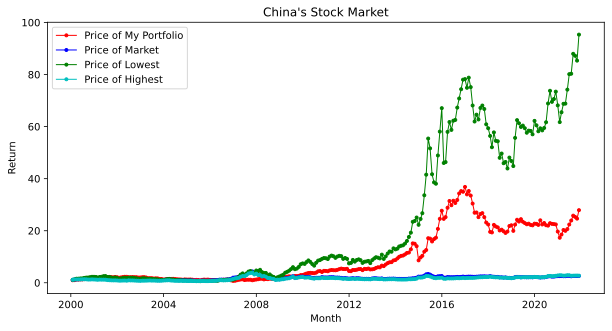

In [35]:
%%time
fig = plt.figure(figsize=(10, 5))
plt.plot(
    'price_portfolio',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPOR)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'price_market', 
    '.-b', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPOR) 

plt.plot(
    'price_p1', 
    '.-g', 
    label='Price of Lowest', 
    linewidth=1, 
    data=MYPOR) 

plt.plot(
    'price_pmax', 
    '.-c', 
    label='Price of Highest', 
    linewidth=1, 
    data=MYPOR) 
plt.legend() # 显示图例
fig = plt.gcf()
fig.savefig('portfolio_size.pdf', bbox_inches='tight')

## Different Periods

In [36]:
MYPOR_sub = MYPOR['2016-01':'2021-11'].copy()
MYPOR_sub['price_p1'] = np.exp(np.cumsum(np.log(MYPOR_sub['P1']+1)))
MYPOR_sub['price_pmax'] = np.exp(np.cumsum(np.log(MYPOR_sub['Pmax']+1)))
MYPOR_sub['price_portfolio'] = np.exp(np.cumsum(np.log(MYPOR_sub['My_portfolio']+1)))
MYPOR_sub['price_market'] = np.exp(np.cumsum(np.log(MYPOR_sub['Raw_return']+1)))
MYPOR_sub

,P1,Pmax,My_portfolio,Raw_return,price_p1,price_pmax,price_portfolio,price_market
month,,,,,,,,
2016-01-31,-0.313997,-0.201041,-0.112956,-0.226487,0.686003,0.798959,0.887044,0.773513
2016-02-29,0.007507,-0.019829,0.027336,-0.018125,0.691153,0.783116,0.911293,0.759492
2016-03-31,0.250341,0.107772,0.142570,0.117538,0.864177,0.867514,1.041215,0.848762
2016-04-30,0.065346,-0.025038,0.090385,-0.021838,0.920648,0.845793,1.135325,0.830226
2016-05-31,-0.049058,0.002789,-0.051846,-0.007385,0.875483,0.848152,1.076462,0.824095
...,...,...,...,...,...,...,...,...
2021-07-31,0.002094,-0.066034,0.068128,-0.053976,1.197144,1.374507,0.863873,0.959929
2021-08-31,0.095323,0.016651,0.078672,0.043145,1.311260,1.397394,0.931836,1.001345
2021-09-30,-0.008425,0.009992,-0.018417,0.006837,1.300212,1.411357,0.914674,1.008191


CPU times: total: 156 ms
Wall time: 150 ms


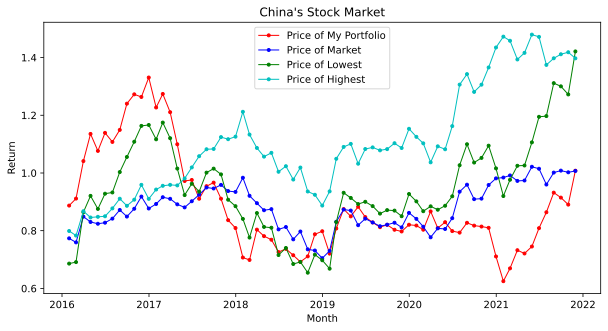

In [37]:
%%time
fig = plt.figure(figsize=(10, 5))
plt.plot(
    'price_portfolio',  
    '.-r', 
    label='Price of My Portfolio',  
    linewidth=1, 
    data=MYPOR_sub)  
plt.title("China's Stock Market") 
plt.xlabel('Month') 
plt.ylabel('Return') 

plt.plot(
    'price_market', 
    '.-b', 
    label='Price of Market', 
    linewidth=1, 
    data=MYPOR_sub) 

plt.plot(
    'price_p1', 
    '.-g', 
    label='Price of Lowest', 
    linewidth=1, 
    data=MYPOR_sub) 

plt.plot(
    'price_pmax', 
    '.-c', 
    label='Price of Highest', 
    linewidth=1, 
    data=MYPOR_sub) 
plt.legend() # 显示图例
fig = plt.gcf()
fig.savefig('portfolio_size_subsample.pdf', bbox_inches='tight')

## 1月效应

In [38]:
portfolio_size_Jan = portfolio_size.copy()
portfolio_size_Jan = portfolio_size_Jan.reset_index()
portfolio_size_Jan['yue'] = portfolio_size_Jan['month'].dt.month
portfolio_size_Jan = portfolio_size_Jan[portfolio_size_Jan['yue'] != 12]
portfolio_size_Jan.set_index(['month'],inplace=True)
portfolio_size_Jan

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio,yue
month,,,,,,,,,,,,
1995-01-31,NaN,-0.020767,-0.029871,-0.013347,-0.026153,-0.032570,-0.017336,-0.014444,-0.023543,NaN,NaN,1
1995-02-28,-0.016839,0.133412,0.131427,0.144274,0.163425,0.140223,0.123253,0.082185,0.106848,-0.026724,0.009884,2
1995-03-31,0.139870,-0.120087,-0.108031,-0.115064,-0.099293,-0.107792,-0.123810,-0.129203,-0.102364,0.112751,0.027119,3
1995-04-30,-0.132475,0.168934,0.242594,0.186158,0.181366,0.193810,0.149370,0.155862,0.185834,-0.109773,-0.022702,4
1995-05-31,0.224696,-0.077278,-0.079573,-0.105362,-0.095792,-0.104924,-0.108287,-0.100798,-0.121778,0.110980,0.113715,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.002094,0.068350,0.068209,0.074504,0.071964,0.063228,0.087025,0.076087,0.068804,-0.066034,0.068128,7
2021-08-31,0.095323,-0.006764,0.005496,-0.009015,-0.026176,-0.020813,-0.014230,-0.027918,-0.005143,0.016651,0.078672,8
2021-09-30,-0.008425,-0.029609,-0.039494,-0.025662,-0.030221,-0.021760,-0.019624,-0.012817,-0.012097,0.009992,-0.018417,9


In [39]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_size_Jan['2000-01':'2021-11']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:31   Log-Likelihood:                 272.21
No. Observations:                 242   AIC:                            -542.4
Df Residuals:                     241   BIC:                            -538.9
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0205      0.005      3.884      0.0

In [40]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_size_Jan['2010-01':'2021-11']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:31   Log-Likelihood:                 160.17
No. Observations:                 132   AIC:                            -318.3
Df Residuals:                     131   BIC:                            -315.5
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0241      0.008      3.181      0.0

## 价值

EP高 回报率高

BM / AM

In [41]:
fenweishu = pd.DataFrame(
    cross.groupby(['month'])['ep'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu = fenweishu.reset_index()
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='ep')
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-01,0.002956,0.003836,0.004363,0.004537,0.004711,0.011987,0.019263,0.025699,0.031296
1991-02-01,0.002958,0.003930,0.004309,0.004688,0.004966,0.005244,0.013876,0.022509,0.030363
1991-03-01,0.004372,0.004548,0.005040,0.005532,0.007924,0.010316,0.017923,0.025530,0.033141
1991-04-01,0.004420,0.004804,0.004970,0.005136,0.008243,0.011350,0.019414,0.027477,0.033992
1991-05-01,0.004025,0.004807,0.004823,0.004839,0.008903,0.012968,0.020588,0.028207,0.032740
...,...,...,...,...,...,...,...,...,...
2021-07-01,-0.036247,0.001236,0.008937,0.015228,0.022192,0.030279,0.040185,0.056352,0.084614
2021-08-01,-0.032166,0.000484,0.008472,0.014751,0.021262,0.028719,0.038973,0.052440,0.080472
2021-09-01,-0.031812,0.000468,0.008778,0.015410,0.021885,0.029054,0.039161,0.053339,0.080926


In [42]:
portfolio = pd.merge(cross,fenweishu,on='month')
portfolio['sort'] = np.where(
    portfolio['ep'] <= portfolio['one'], 'P1',
    np.where(
        portfolio['ep'] <= portfolio['two'], 'P2',
        np.where(
            portfolio['ep'] <= portfolio['three'], 'P3',
            np.where(
                portfolio['ep'] <= portfolio['four'], 'P4',
                np.where(
                    portfolio['ep'] <= portfolio['five'], 'P5',
                    np.where(
                        portfolio['ep'] <= portfolio['six'], 'P6',
                        np.where(
                            portfolio['ep'] <= portfolio['seven'], 'P7',
                            np.where(
                                portfolio['ep'] <= portfolio['eight'], 'P8',
                                np.where(
                                    portfolio['ep'] <= portfolio['nine'],
                                    'P9', 'Pmax')))))))))
portfolio

,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1,one,two,three,four,five,six,seven,eight,nine,sort
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883,0.004025,0.004807,0.004823,0.004839,0.008903,0.012968,0.020588,0.028207,0.032740,Pmax
1,2,1991-05-01,3.161200e+08,4.656752e+08,-0.030901,0.006092,5,17,-0.036993,-0.309901,19.571632,19.958999,1,11.29,-84.718227,71.0,-84.718227,71.0,NaN,NaN,NaN,0.055375,0.001412,0.016379,0.004025,0.004807,0.004823,0.004839,0.008903,0.012968,0.020588,0.028207,0.032740,Pmax
2,4,1991-05-01,4.950000e+07,1.237500e+08,-0.114490,0.006092,5,16,-0.120582,-0.460637,17.717483,18.633774,1,9.90,14.033671,62.0,14.033671,62.0,NaN,NaN,NaN,0.036300,0.002604,0.014563,0.004025,0.004807,0.004823,0.004839,0.008903,0.012968,0.020588,0.028207,0.032740,Pmax
3,5,1991-05-01,4.502265e+08,9.495000e+08,-0.123026,0.006092,5,20,-0.129118,-0.115097,19.925261,20.671446,1,10.55,8.686426,77.0,8.686426,77.0,NaN,NaN,NaN,0.030158,0.001104,-0.004566,0.004025,0.004807,0.004823,0.004839,0.008903,0.012968,0.020588,0.028207,0.032740,Pmax
4,600601,1991-05-01,3.576300e+07,3.930000e+07,-0.124722,0.006092,6,22,-0.130814,0.184748,17.392424,17.486735,1,39.30,0.998295,90.0,0.998295,90.0,0.270784,0.515407,0.012968,0.081956,0.002149,0.010499,0.004025,0.004807,0.004823,0.004839,0.008903,0.012968,0.020588,0.028207,0.032740,P6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596105,600602,1991-01-01,2.479550e+08,1.010000e+09,0.009798,0.006930,2,22,0.002868,0.010496,19.328758,20.733216,1,505.00,0.985174,30.0,0.985174,30.0,0.294219,1.157426,0.022901,0.117475,0.000648,0.010097,0.002956,0.003836,0.004363,0.004537,0.004711,0.011987,0.019263,0.025699,0.031296,P8
596106,600651,1991-01-01,1.324290e+07,1.324290e+07,0.000000,0.006930,2,20,-0.006930,-0.041567,16.398972,16.398972,1,401.30,1.002168,28.0,1.002168,28.0,0.162400,0.440908,0.036893,0.084182,0.000604,0.010116,0.002956,0.003836,0.004363,0.004537,0.004711,0.011987,0.019263,0.025699,0.031296,Pmax
596107,600652,1991-01-01,1.756800e+06,1.756800e+06,0.062409,0.006930,2,11,0.055479,0.028134,14.379005,14.379005,1,219.60,27.225631,15.0,27.225631,15.0,NaN,NaN,NaN,0.113500,0.000332,0.010160,0.002956,0.003836,0.004363,0.004537,0.004711,0.011987,0.019263,0.025699,0.031296,Pmax
596108,600654,1991-01-01,8.353800e+06,8.357778e+07,0.041089,0.006930,2,22,0.034159,0.081305,15.938227,18.241288,1,397.80,1747.783931,27.0,1747.783931,27.0,0.302221,1.365722,0.004276,0.157667,0.000733,0.010106,0.002956,0.003836,0.004363,0.004537,0.004711,0.011987,0.019263,0.025699,0.031296,P3


In [43]:
portfolio_value =  pd.DataFrame(
    portfolio.groupby(['month','sort']).apply(lambda x: np.average(x['next_ret'],weights = x['floatingvalue'])))
portfolio_value = portfolio_value.reset_index()
portfolio_value.columns = ['month', 'sort', 'p']
portfolio_value


,month,sort,p
0,1991-01-01,P1,0.038284
1,1991-01-01,P3,0.081305
2,1991-01-01,P5,-0.002070
3,1991-01-01,P8,0.010496
4,1991-01-01,Pmax,-0.033403
...,...,...,...
3652,2021-11-01,P6,0.036925
3653,2021-11-01,P7,0.029959
3654,2021-11-01,P8,0.046561
3655,2021-11-01,P9,0.054629


In [44]:
portfolio_value = portfolio_value.pivot_table(index='month',
                                                    columns='sort',
                                                    values='p')
portfolio_value['My_portfolio'] = portfolio_value['Pmax'] - portfolio_value['P1']
portfolio_value

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-01-01,0.038284,NaN,0.081305,NaN,-0.002070,NaN,NaN,0.010496,NaN,-0.033403,-0.071687
1991-02-01,-0.044343,-0.070455,NaN,0.023904,NaN,-0.059149,NaN,-0.125264,NaN,-0.132351,-0.088008
1991-03-01,-0.133193,0.120035,NaN,0.070484,NaN,-0.097744,NaN,-0.077512,NaN,-0.120123,0.013070
1991-04-01,0.238572,-0.006657,NaN,0.055289,NaN,-0.130814,NaN,-0.031989,NaN,-0.091997,-0.330569
1991-05-01,0.201980,0.177858,NaN,0.213185,NaN,0.184748,NaN,0.190006,NaN,-0.157574,-0.359554
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,0.072364,0.082940,-0.018852,0.007005,0.038703,-0.027045,0.047840,0.094558,0.073110,0.059109,-0.013255
2021-08-01,-0.014346,-0.031706,-0.033541,-0.050827,-0.023738,0.043538,0.013582,-0.010847,0.025359,0.025852,0.040197
2021-09-01,-0.024712,-0.005498,0.043099,0.038953,0.027330,0.010895,0.001053,-0.013243,-0.048401,-0.030845,-0.006133


In [45]:
portfolio_value = portfolio_value['1995-01':'2021-11'].copy()
portfolio_value['month'] = pd.date_range(start='1995-01', end='2021-12', freq='m')
portfolio_value.set_index('month', inplace = True)
portfolio_value['My_portfolio'] = portfolio_value['My_portfolio'].shift(1)
portfolio_value['P1'] = portfolio_value['P1'].shift(1)
portfolio_value['Pmax'] = portfolio_value['Pmax'].shift(1)
portfolio_value

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1995-01-31,NaN,-0.039864,0.004335,0.010141,-0.046855,-0.014133,0.004822,0.004398,0.005364,NaN,NaN
1995-02-28,-0.046564,0.039614,0.186807,0.105647,0.145939,0.211369,0.125131,0.011332,0.115488,-0.024624,0.021940
1995-03-31,0.166651,-0.098151,-0.098700,-0.116309,-0.102409,-0.120334,-0.137053,-0.103988,-0.097787,0.127896,-0.038756
1995-04-30,-0.120087,0.204040,0.234579,0.253050,0.214616,0.167814,0.205651,0.126672,0.104440,-0.115931,0.004156
1995-05-31,0.169172,-0.111554,-0.118523,-0.122750,-0.117578,-0.088642,-0.073883,-0.080621,-0.081471,0.103800,-0.065371
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,-0.029583,0.082940,-0.018852,0.007005,0.038703,-0.027045,0.047840,0.094558,0.073110,-0.064818,-0.035236
2021-08-31,0.072364,-0.031706,-0.033541,-0.050827,-0.023738,0.043538,0.013582,-0.010847,0.025359,0.059109,-0.013255
2021-09-30,-0.014346,-0.005498,0.043099,0.038953,0.027330,0.010895,0.001053,-0.013243,-0.048401,0.025852,0.040197


In [46]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_value['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:33   Log-Likelihood:                 370.92
No. Observations:                 263   AIC:                            -739.8
Df Residuals:                     262   BIC:                            -736.3
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0030      0.003      1.017      0.3

In [47]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_value['2010-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:33   Log-Likelihood:                 208.22
No. Observations:                 143   AIC:                            -414.4
Df Residuals:                     142   BIC:                            -411.5
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0028      0.004      0.688      0.4

## 改进

In [48]:
fenweishu = pd.DataFrame(
    cross.groupby(['month'])['totalvalue'].quantile(0.3))
fenweishu.columns = ['fenweishu_guimo']
fenweishu

,fenweishu_guimo
month,
1991-01-01,4.841034e+07
1991-02-01,6.941160e+07
1991-03-01,4.002500e+07
1991-04-01,3.729500e+07
1991-05-01,3.930000e+07
...,...
2021-07-01,3.467994e+09
2021-08-01,3.654128e+09
2021-09-01,3.590758e+09


In [49]:
cross_new = pd.merge(cross,fenweishu,on='month',how='left')
cross_new = cross_new[cross_new['totalvalue'] > cross_new['fenweishu_guimo']]
cross_new

,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1,fenweishu_guimo
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883,3.930000e+07
1,1,1991-06-01,9.007350e+08,1.648521e+09,-0.113459,0.006092,3,23,-0.119551,-0.137013,20.618722,21.223144,1,33.99,0.246808,67.0,0.246808,67.0,NaN,NaN,NaN,0.001155,0.000895,0.004956,4.680000e+07
2,1,1991-07-01,7.828100e+08,1.432695e+09,-0.130921,0.006092,4,16,-0.137013,-0.417680,20.478401,21.082823,1,29.54,0.165424,83.0,0.165424,83.0,NaN,NaN,NaN,0.000230,0.001596,-0.004853,4.962750e+07
3,1,1991-08-01,6.748338e+08,1.346275e+09,-0.411588,0.006092,5,15,-0.417680,-0.039425,20.329977,21.020607,1,15.00,1.506699,98.0,1.506699,98.0,NaN,NaN,NaN,0.072087,0.240913,0.152896,5.697000e+07
4,1,1991-09-01,6.523394e+08,1.301399e+09,-0.033333,0.006092,6,24,-0.039425,0.849080,20.296075,20.986706,1,14.50,1.502630,122.0,1.502630,122.0,NaN,NaN,NaN,0.160940,0.005872,0.032258,5.776000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596103,605589,2021-09-01,2.424505e+09,2.317357e+10,-0.112635,0.001241,2,20,-0.113876,-0.002913,21.608893,23.866278,1,29.91,2.473564,35.0,2.473564,35.0,NaN,NaN,NaN,2.844370,0.049481,0.100135,3.590758e+09
596104,605589,2021-10-01,2.420452e+09,2.313484e+10,-0.001672,0.001241,3,16,-0.002913,0.317915,21.607220,23.864605,1,29.86,2.111056,51.0,2.111056,51.0,0.342809,0.566531,NaN,0.999932,0.016392,0.100069,3.399457e+09
596105,605589,2021-11-01,3.192953e+09,3.051846e+10,0.319156,0.001241,4,22,0.317915,-0.028913,21.884212,24.141598,1,39.39,2.063907,73.0,2.063907,73.0,0.259870,0.429465,NaN,1.812936,0.025807,0.077155,3.823338e+09
596108,605599,2021-10-01,9.076669e+08,9.076667e+09,-0.080378,0.001241,2,16,-0.081619,0.060456,20.626388,22.928973,1,11.67,1.339638,29.0,1.339638,29.0,0.342676,0.529242,NaN,0.970121,0.009502,0.034691,3.399457e+09


In [50]:
fenweishu = pd.DataFrame(
    cross_new.groupby(['month'])['ep'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
fenweishu = fenweishu.reset_index()
fenweishu = fenweishu.pivot_table(index='month',columns='level_1',values='ep')
fenweishu.columns = ['one','two','three','four','five','six','seven','eight','nine']
fenweishu

,one,two,three,four,five,six,seven,eight,nine
month,,,,,,,,,
1991-01-01,0.002736,0.003396,0.004056,0.004363,0.004494,0.004624,0.006530,0.011987,0.017444
1991-02-01,0.002569,0.003152,0.003735,0.004081,0.004309,0.004536,0.006470,0.011816,0.017163
1991-03-01,0.004302,0.004407,0.004513,0.005702,0.007432,0.009163,0.011838,0.016402,0.020966
1991-04-01,0.004267,0.004497,0.004727,0.006113,0.008077,0.010041,0.012963,0.017801,0.022639
1991-05-01,0.003556,0.003869,0.004181,0.004494,0.004807,0.009487,0.014167,0.018847,0.023527
...,...,...,...,...,...,...,...,...,...
2021-07-01,-0.014763,0.005488,0.011881,0.018277,0.025231,0.033616,0.045825,0.063133,0.100196
2021-08-01,-0.011026,0.005400,0.011846,0.017761,0.024709,0.032918,0.044220,0.060682,0.095030
2021-09-01,-0.012786,0.005532,0.012039,0.018457,0.025165,0.033025,0.044270,0.059385,0.093194


In [51]:
portfolio = pd.merge(cross_new,fenweishu,on='month')
portfolio['sort'] = np.where(
    portfolio['ep'] <= portfolio['one'], 'P1',
    np.where(
        portfolio['ep'] <= portfolio['two'], 'P2',
        np.where(
            portfolio['ep'] <= portfolio['three'], 'P3',
            np.where(
                portfolio['ep'] <= portfolio['four'], 'P4',
                np.where(
                    portfolio['ep'] <= portfolio['five'], 'P5',
                    np.where(
                        portfolio['ep'] <= portfolio['six'], 'P6',
                        np.where(
                            portfolio['ep'] <= portfolio['seven'], 'P7',
                            np.where(
                                portfolio['ep'] <= portfolio['eight'], 'P8',
                                np.where(
                                    portfolio['ep'] <= portfolio['nine'],
                                    'P9', 'Pmax')))))))))
portfolio


,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1,fenweishu_guimo,one,two,three,four,five,six,seven,eight,nine,sort
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883,3.930000e+07,0.003556,0.003869,0.004181,0.004494,0.004807,0.009487,0.014167,0.018847,0.023527,Pmax
1,2,1991-05-01,3.161200e+08,4.656752e+08,-0.030901,0.006092,5,17,-0.036993,-0.309901,19.571632,19.958999,1,11.29,-84.718227,71.0,-84.718227,71.0,NaN,NaN,NaN,0.055375,0.001412,0.016379,3.930000e+07,0.003556,0.003869,0.004181,0.004494,0.004807,0.009487,0.014167,0.018847,0.023527,Pmax
2,4,1991-05-01,4.950000e+07,1.237500e+08,-0.114490,0.006092,5,16,-0.120582,-0.460637,17.717483,18.633774,1,9.90,14.033671,62.0,14.033671,62.0,NaN,NaN,NaN,0.036300,0.002604,0.014563,3.930000e+07,0.003556,0.003869,0.004181,0.004494,0.004807,0.009487,0.014167,0.018847,0.023527,Pmax
3,5,1991-05-01,4.502265e+08,9.495000e+08,-0.123026,0.006092,5,20,-0.129118,-0.115097,19.925261,20.671446,1,10.55,8.686426,77.0,8.686426,77.0,NaN,NaN,NaN,0.030158,0.001104,-0.004566,3.930000e+07,0.003556,0.003869,0.004181,0.004494,0.004807,0.009487,0.014167,0.018847,0.023527,Pmax
4,600602,1991-05-01,2.013100e+08,8.200000e+08,-0.025897,0.006092,6,22,-0.031989,0.190006,19.120357,20.524815,1,410.00,0.972468,113.0,0.972468,113.0,0.362391,1.425610,0.028207,0.139454,0.002130,0.010101,3.930000e+07,0.003556,0.003869,0.004181,0.004494,0.004807,0.009487,0.014167,0.018847,0.023527,Pmax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417174,601999,2010-08-01,1.810000e+09,6.748705e+09,0.035503,0.001856,33,22,0.033647,-0.000223,21.318249,22.632616,1,12.25,1.015962,126.0,1.020699,243.0,0.224055,0.334534,0.017236,0.845668,0.008376,0.035013,2.993750e+09,-0.000872,0.007410,0.012855,0.017334,0.021397,0.027038,0.035272,0.047339,0.065290,P4
417175,600601,1991-01-01,2.234050e+08,2.455000e+08,0.017406,0.006930,2,20,0.010476,0.038284,19.224497,19.318808,1,245.50,0.985740,28.0,0.985740,28.0,0.043347,0.082507,0.002076,0.009574,0.000651,0.010158,4.841034e+07,0.002736,0.003396,0.004056,0.004363,0.004494,0.004624,0.006530,0.011987,0.017444,P1
417176,600602,1991-01-01,2.479550e+08,1.010000e+09,0.009798,0.006930,2,22,0.002868,0.010496,19.328758,20.733216,1,505.00,0.985174,30.0,0.985174,30.0,0.294219,1.157426,0.022901,0.117475,0.000648,0.010097,4.841034e+07,0.002736,0.003396,0.004056,0.004363,0.004494,0.004624,0.006530,0.011987,0.017444,Pmax
417177,600654,1991-01-01,8.353800e+06,8.357778e+07,0.041089,0.006930,2,22,0.034159,0.081305,15.938227,18.241288,1,397.80,1747.783931,27.0,1747.783931,27.0,0.302221,1.365722,0.004276,0.157667,0.000733,0.010106,4.841034e+07,0.002736,0.003396,0.004056,0.004363,0.004494,0.004624,0.006530,0.011987,0.017444,P4


In [52]:
portfolio_value =  pd.DataFrame(
    portfolio.groupby(['month','sort']).apply(lambda x: np.average(x['next_ret'],weights = x['floatingvalue'])))
portfolio_value = portfolio_value.reset_index()
portfolio_value.columns = ['month', 'sort', 'p']
portfolio_value

,month,sort,p
0,1991-01-01,P1,0.038284
1,1991-01-01,P4,0.081305
2,1991-01-01,P7,-0.002070
3,1991-01-01,Pmax,0.010496
4,1991-02-01,P1,-0.044343
...,...,...,...
3500,2021-11-01,P6,0.033046
3501,2021-11-01,P7,0.044426
3502,2021-11-01,P8,0.056573
3503,2021-11-01,P9,0.037993


In [53]:
portfolio_value = portfolio_value.pivot_table(index='month',
                                                    columns='sort',
                                                    values='p')
portfolio_value['My_portfolio'] = portfolio_value['Pmax'] - portfolio_value['P1']
portfolio_value

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1991-01-01,0.038284,NaN,NaN,0.081305,NaN,NaN,-0.002070,NaN,NaN,0.010496,-0.027788
1991-02-01,-0.044343,NaN,NaN,-0.070455,NaN,NaN,0.023904,NaN,NaN,-0.131919,-0.087576
1991-03-01,-0.133193,NaN,NaN,0.120035,NaN,NaN,-0.097744,NaN,NaN,-0.113936,0.019256
1991-04-01,0.238572,NaN,NaN,-0.006657,NaN,NaN,-0.130814,NaN,NaN,-0.083207,-0.321779
1991-05-01,0.201980,NaN,NaN,NaN,0.177858,NaN,NaN,NaN,NaN,-0.125815,-0.327795
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,0.081597,-0.017251,0.011585,0.024062,-0.007447,-0.012842,0.060322,0.090585,0.076257,0.055129,-0.026468
2021-08-01,-0.021243,-0.069375,-0.015243,-0.051293,-0.022816,0.056098,-0.006222,-0.000739,0.019318,0.031789,0.053032
2021-09-01,-0.011012,0.007525,0.047312,0.039703,0.015344,0.012155,-0.002466,-0.015531,-0.046076,-0.032425,-0.021412


In [54]:
portfolio_value = portfolio_value['1995-01':'2021-11'].copy()
portfolio_value['month'] = pd.date_range(start='1995-01', end='2021-12', freq='m')
portfolio_value.set_index('month', inplace = True)
portfolio_value['My_portfolio'] = portfolio_value['My_portfolio'].shift(1)
portfolio_value['P1'] = portfolio_value['P1'].shift(1)
portfolio_value['Pmax'] = portfolio_value['Pmax'].shift(1)
portfolio_value

sort,P1,P2,P3,P4,P5,P6,P7,P8,P9,Pmax,My_portfolio
month,,,,,,,,,,,
1995-01-31,NaN,0.014555,0.008496,-0.051571,-0.031356,0.013759,0.000756,0.007651,0.025464,NaN,NaN
1995-02-28,-0.046777,0.035090,0.209913,0.111720,0.207424,0.192222,0.013933,0.075066,0.096007,-0.025435,0.021342
1995-03-31,0.165296,-0.098671,-0.106664,-0.080218,-0.113669,-0.123284,-0.134977,-0.112426,-0.089648,0.127343,-0.037952
1995-04-30,-0.131195,0.206046,0.217316,0.251240,0.204317,0.140810,0.125468,0.137936,0.068364,-0.112160,0.019035
1995-05-31,0.179534,-0.113925,-0.120305,-0.137234,-0.131440,-0.101975,-0.083346,-0.091062,-0.066861,0.115130,-0.064404
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,-0.040349,-0.017251,0.011585,0.024062,-0.007447,-0.012842,0.060322,0.090585,0.076257,-0.069103,-0.028754
2021-08-31,0.081597,-0.069375,-0.015243,-0.051293,-0.022816,0.056098,-0.006222,-0.000739,0.019318,0.055129,-0.026468
2021-09-30,-0.021243,0.007525,0.047312,0.039703,0.015344,0.012155,-0.002466,-0.015531,-0.046076,0.031789,0.053032


In [55]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_value['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:34   Log-Likelihood:                 375.72
No. Observations:                 263   AIC:                            -749.4
Df Residuals:                     262   BIC:                            -745.9
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0061      0.003      2.137      0.0

In [56]:
model_port = smf.ols('My_portfolio ~ 1',
                 data=portfolio_value['2010-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_port.summary())

                            OLS Regression Results                            
Dep. Variable:           My_portfolio   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                nan
Time:                        21:59:34   Log-Likelihood:                 208.10
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     142   BIC:                            -411.2
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0058      0.004      1.424      0.1